# Exploratory Data Analysis

In [25]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1.1 Load Data

In [26]:
df = pd.read_csv("train.csv")
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Spondylolisthesis
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,Spondylolisthesis
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,Hernia
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,Spondylolisthesis
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal


# 1.2 One Hot Encode Class

In [27]:
encoded = pd.get_dummies(df["class"], prefix="class_")

df = pd.concat([df.drop("class", axis=1), encoded], axis=1)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class__Hernia,class__Normal,class__Spondylolisthesis
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,0,1
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,0,0,1
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,1,0,0
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0,1
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0,1,0


# 2.1 Explore Distributions

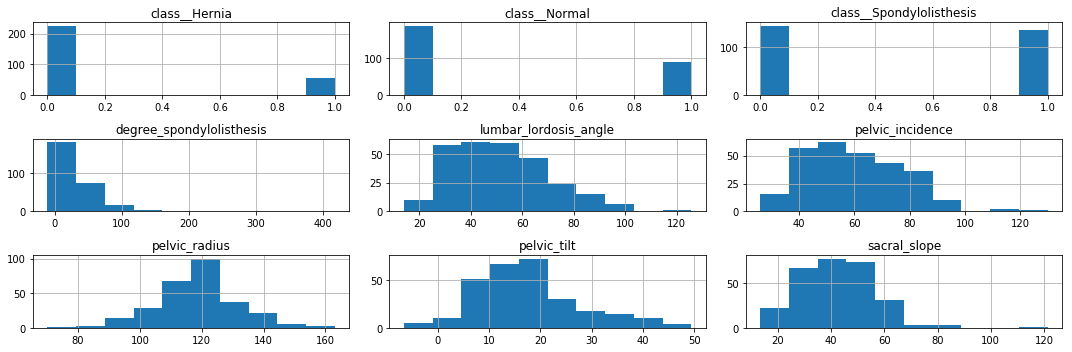

In [28]:
df.hist(figsize=(15, 5))
plt.tight_layout()
plt.show()

It Appears lumbar_lordosis_angle and degree spondylolisthesis are skewed. Now I will examine degree_spondylolisthesis after a log transformation.

C:\Users\zasz\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


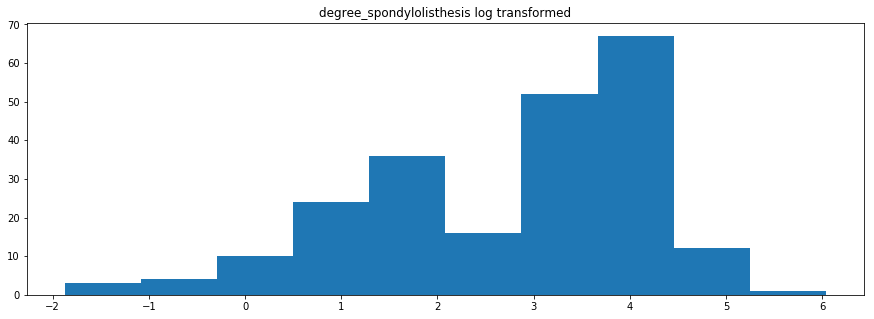

In [29]:
plt.figure(figsize=(15, 5))
plt.hist(np.log(df.degree_spondylolisthesis))
plt.title("degree_spondylolisthesis log transformed")
plt.show()

Now I will add the log transformed feature to the dataframe.

In [30]:
log_spondylolisthesis = pd.Series(np.log(df.degree_spondylolisthesis), name="log_spondylolisthesis")
df = pd.concat([df, log_spondylolisthesis], axis=1)

df.head()

C:\Users\zasz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class__Hernia,class__Normal,class__Spondylolisthesis,log_spondylolisthesis
0,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,0,0,1,4.608087
1,63.404481,14.115327,48.136806,49.289153,111.916008,31.784495,0,0,1,3.458979
2,52.419385,19.011561,35.872660,33.407825,116.559771,1.694705,1,0,0,0.527509
3,91.468741,24.508177,84.620272,66.960564,117.307897,52.623047,0,0,1,3.963154
4,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0,1,0,1.608276


# 3.1 Explore Bivariate Relationships

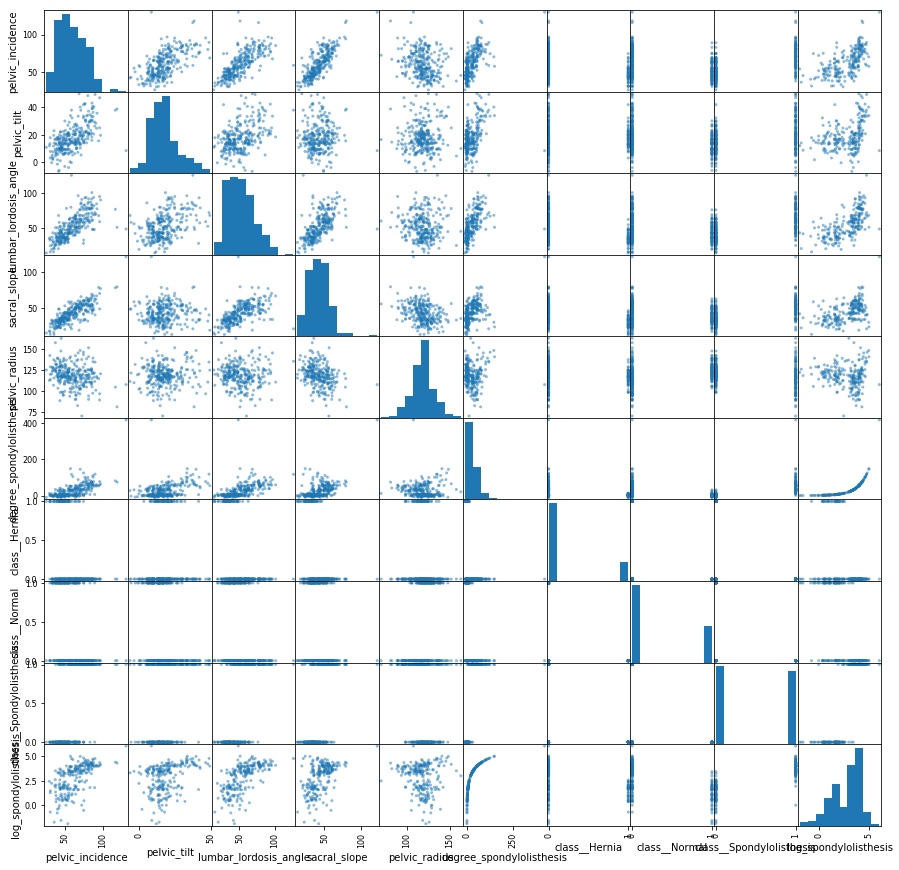

In [31]:
# plot a scatter plot for every combination of variables
pd.plotting.scatter_matrix(df, figsize=(15, 15));

Many of the variables share linear relationships. This can cause colinearity.

# 3.2 Explore Multicolinearity

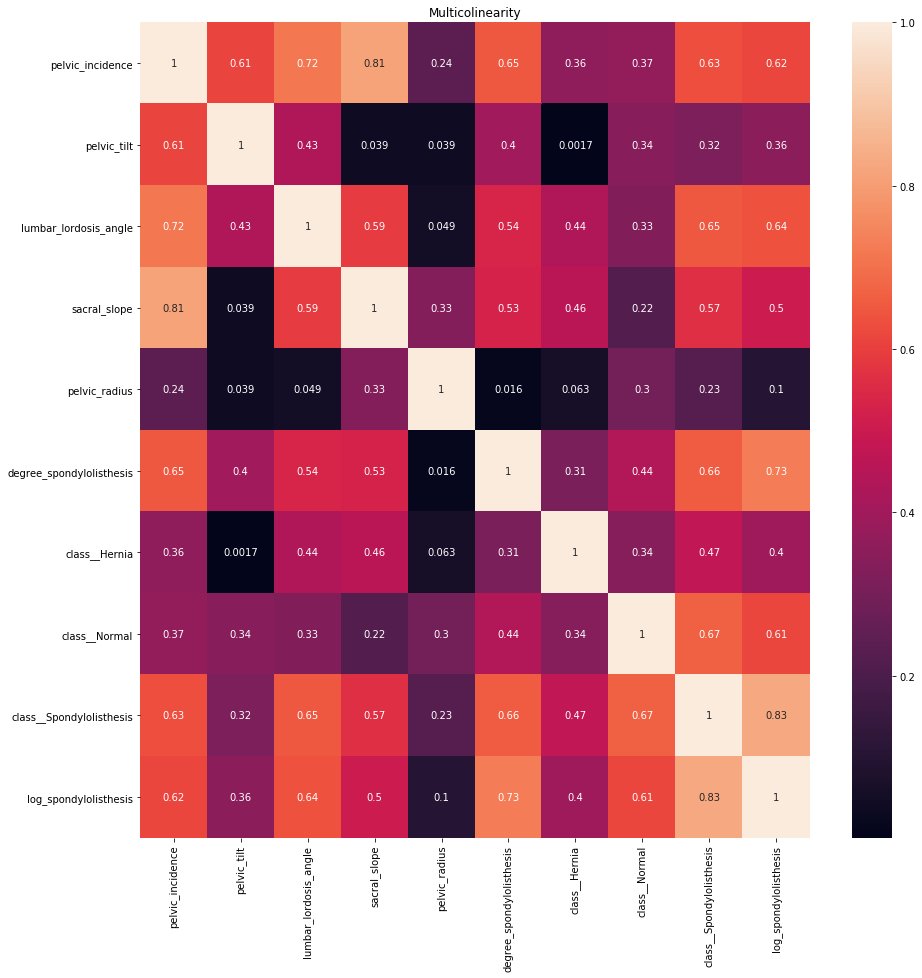

In [33]:
# plot heatmap of correlation
plt.figure(figsize=(15, 15))
sns.heatmap(abs(df.corr()), annot=True)
plt.title("Multicolinearity")
plt.show()

# 4.1 Multivariate Relationships



 class__Hernia 




<Figure size 1080x360 with 0 Axes>

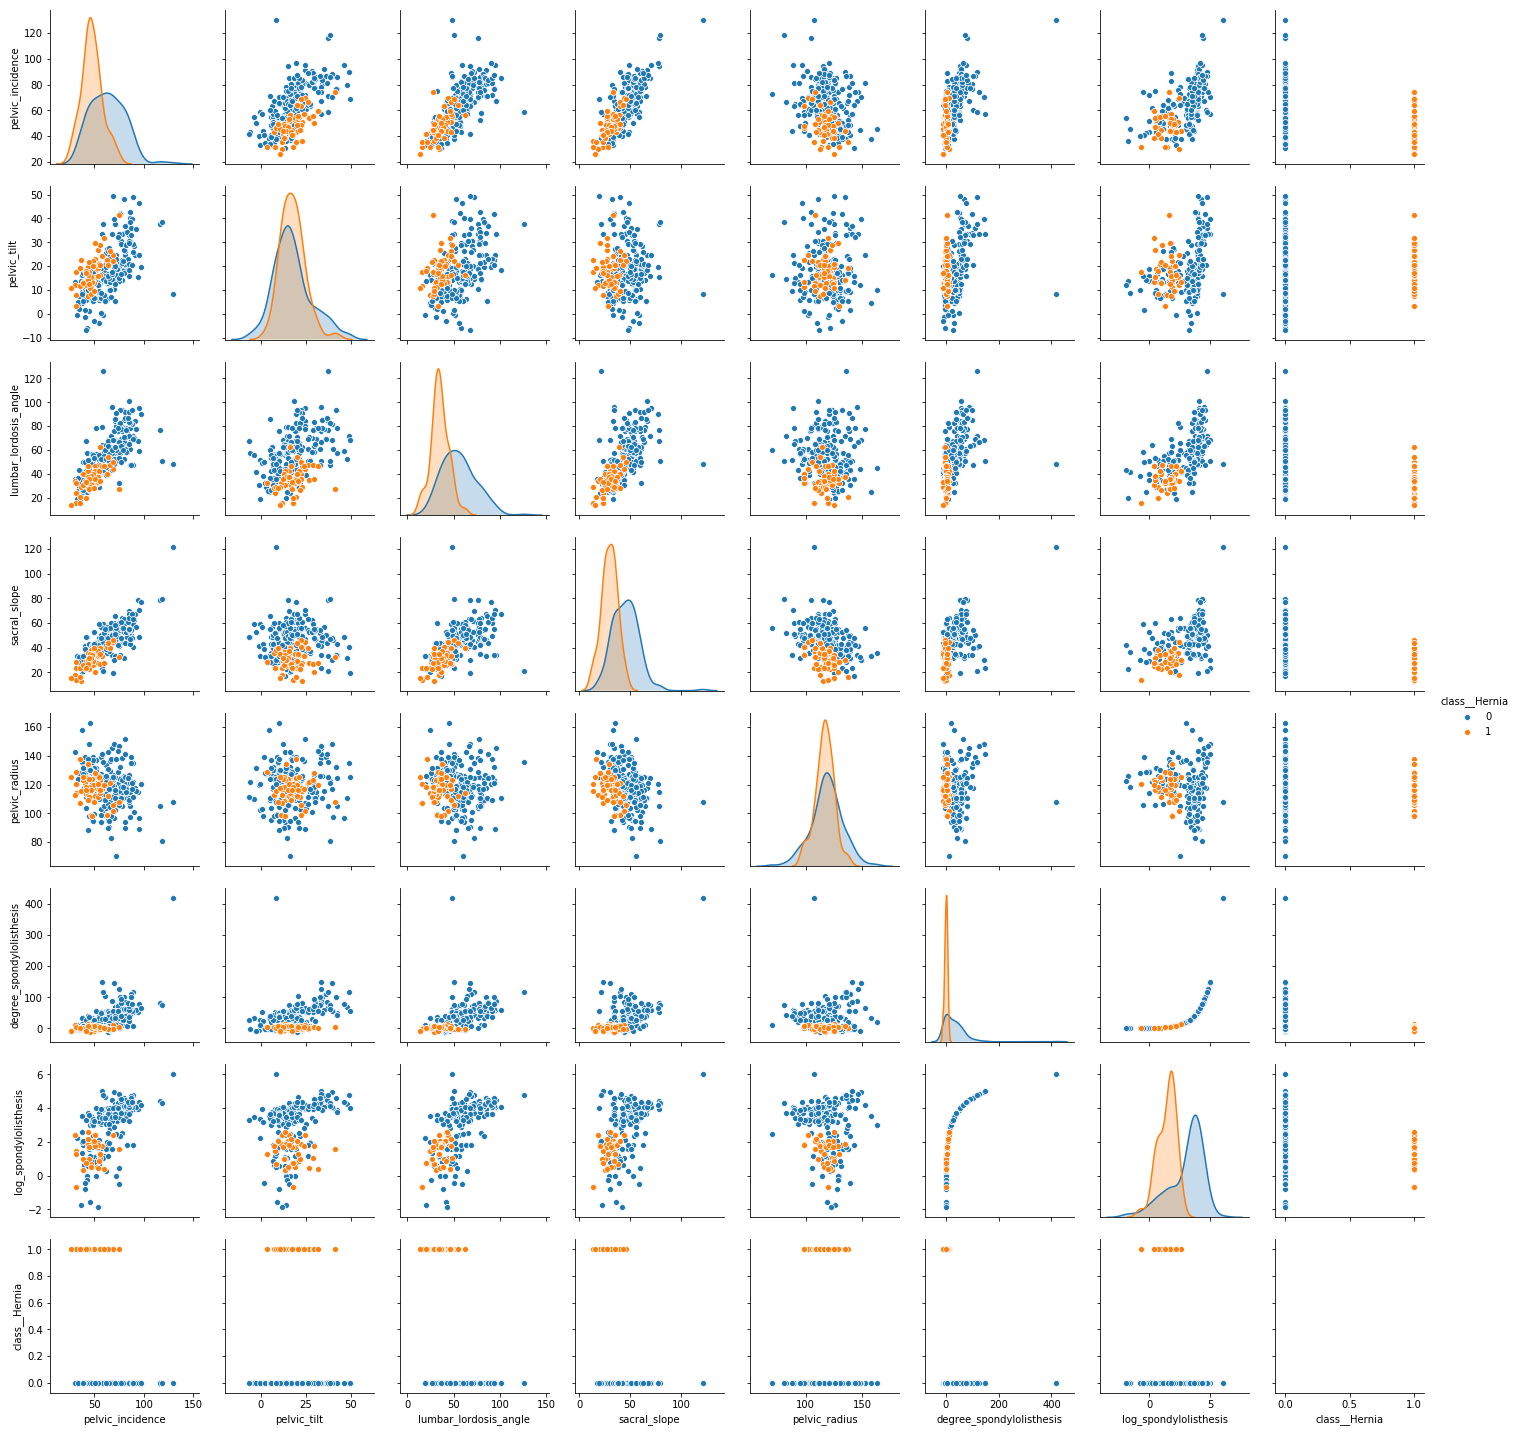



 class__Normal 




<Figure size 1080x360 with 0 Axes>

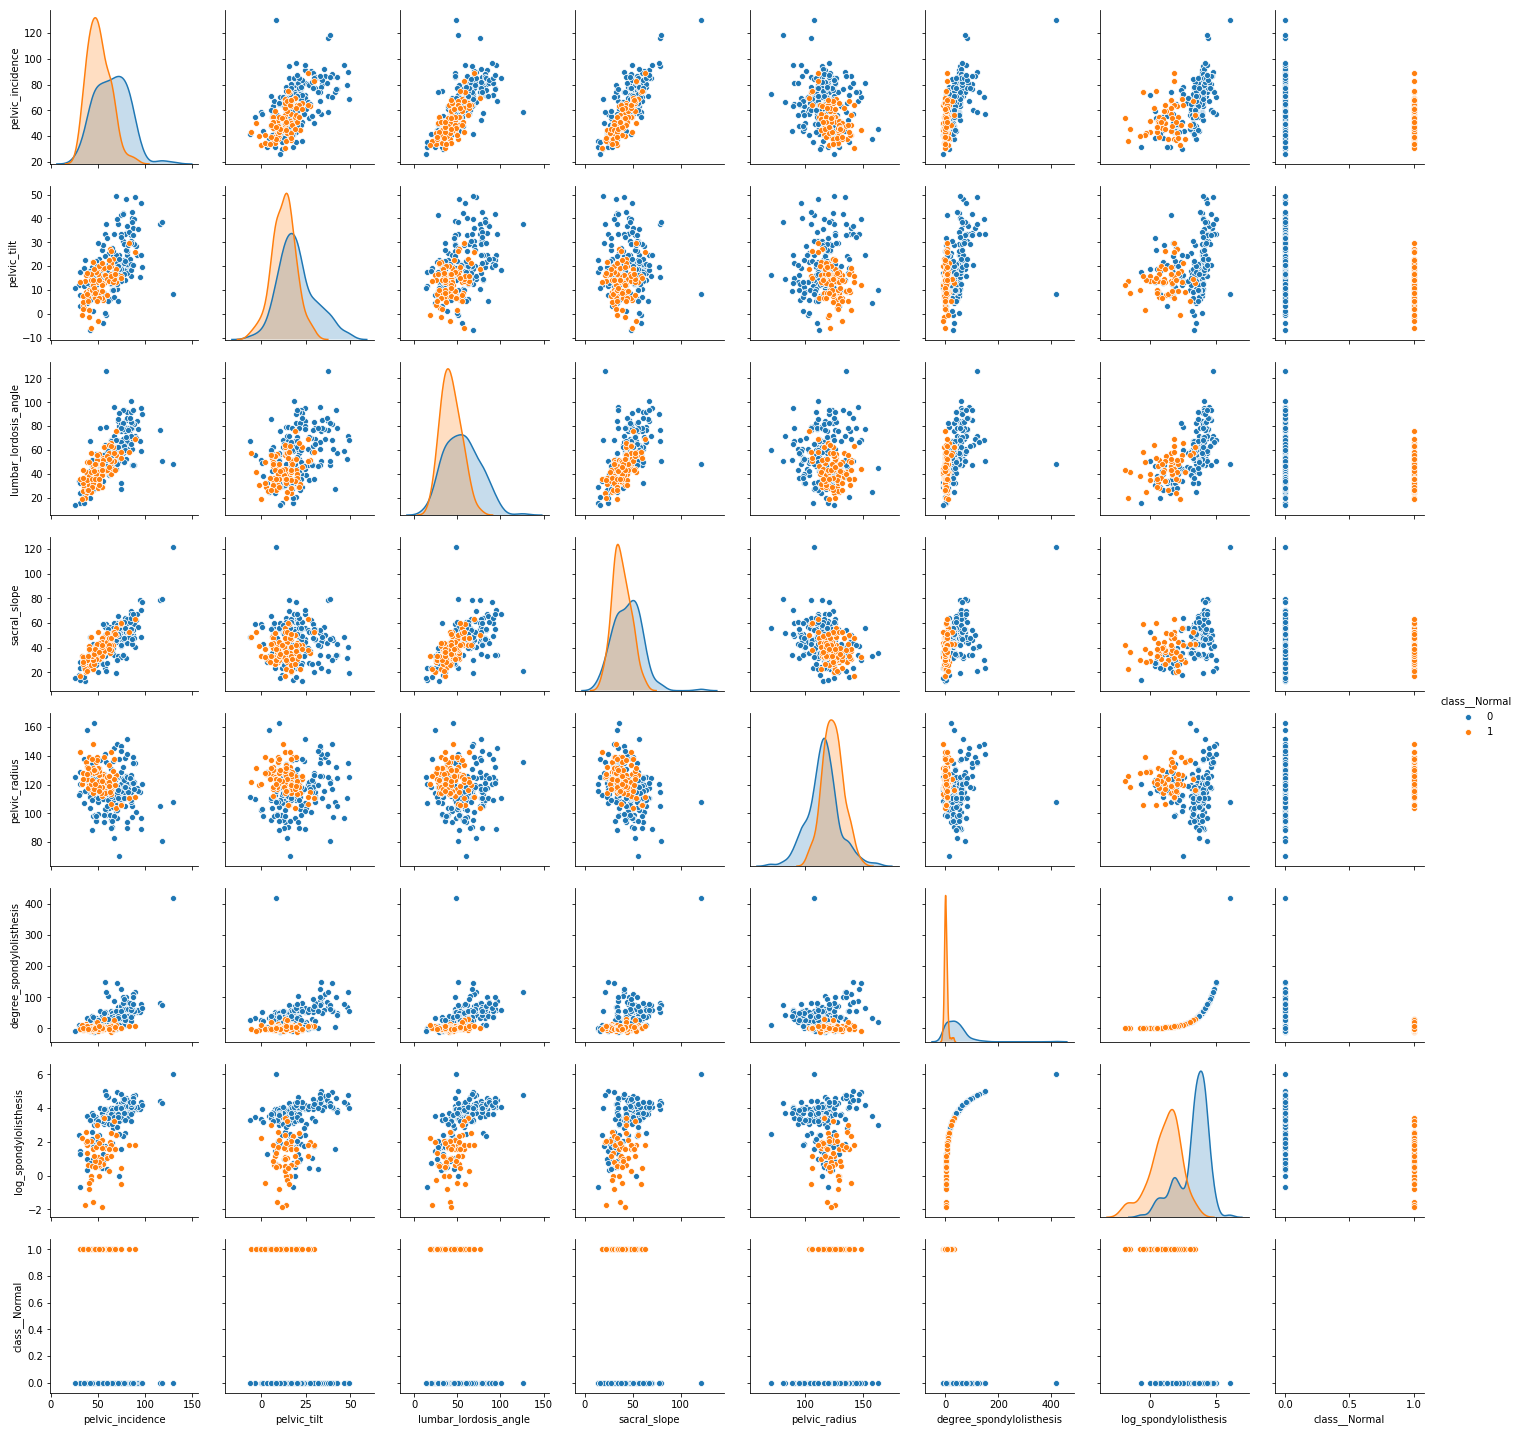



 class__Spondylolisthesis 




<Figure size 1080x360 with 0 Axes>

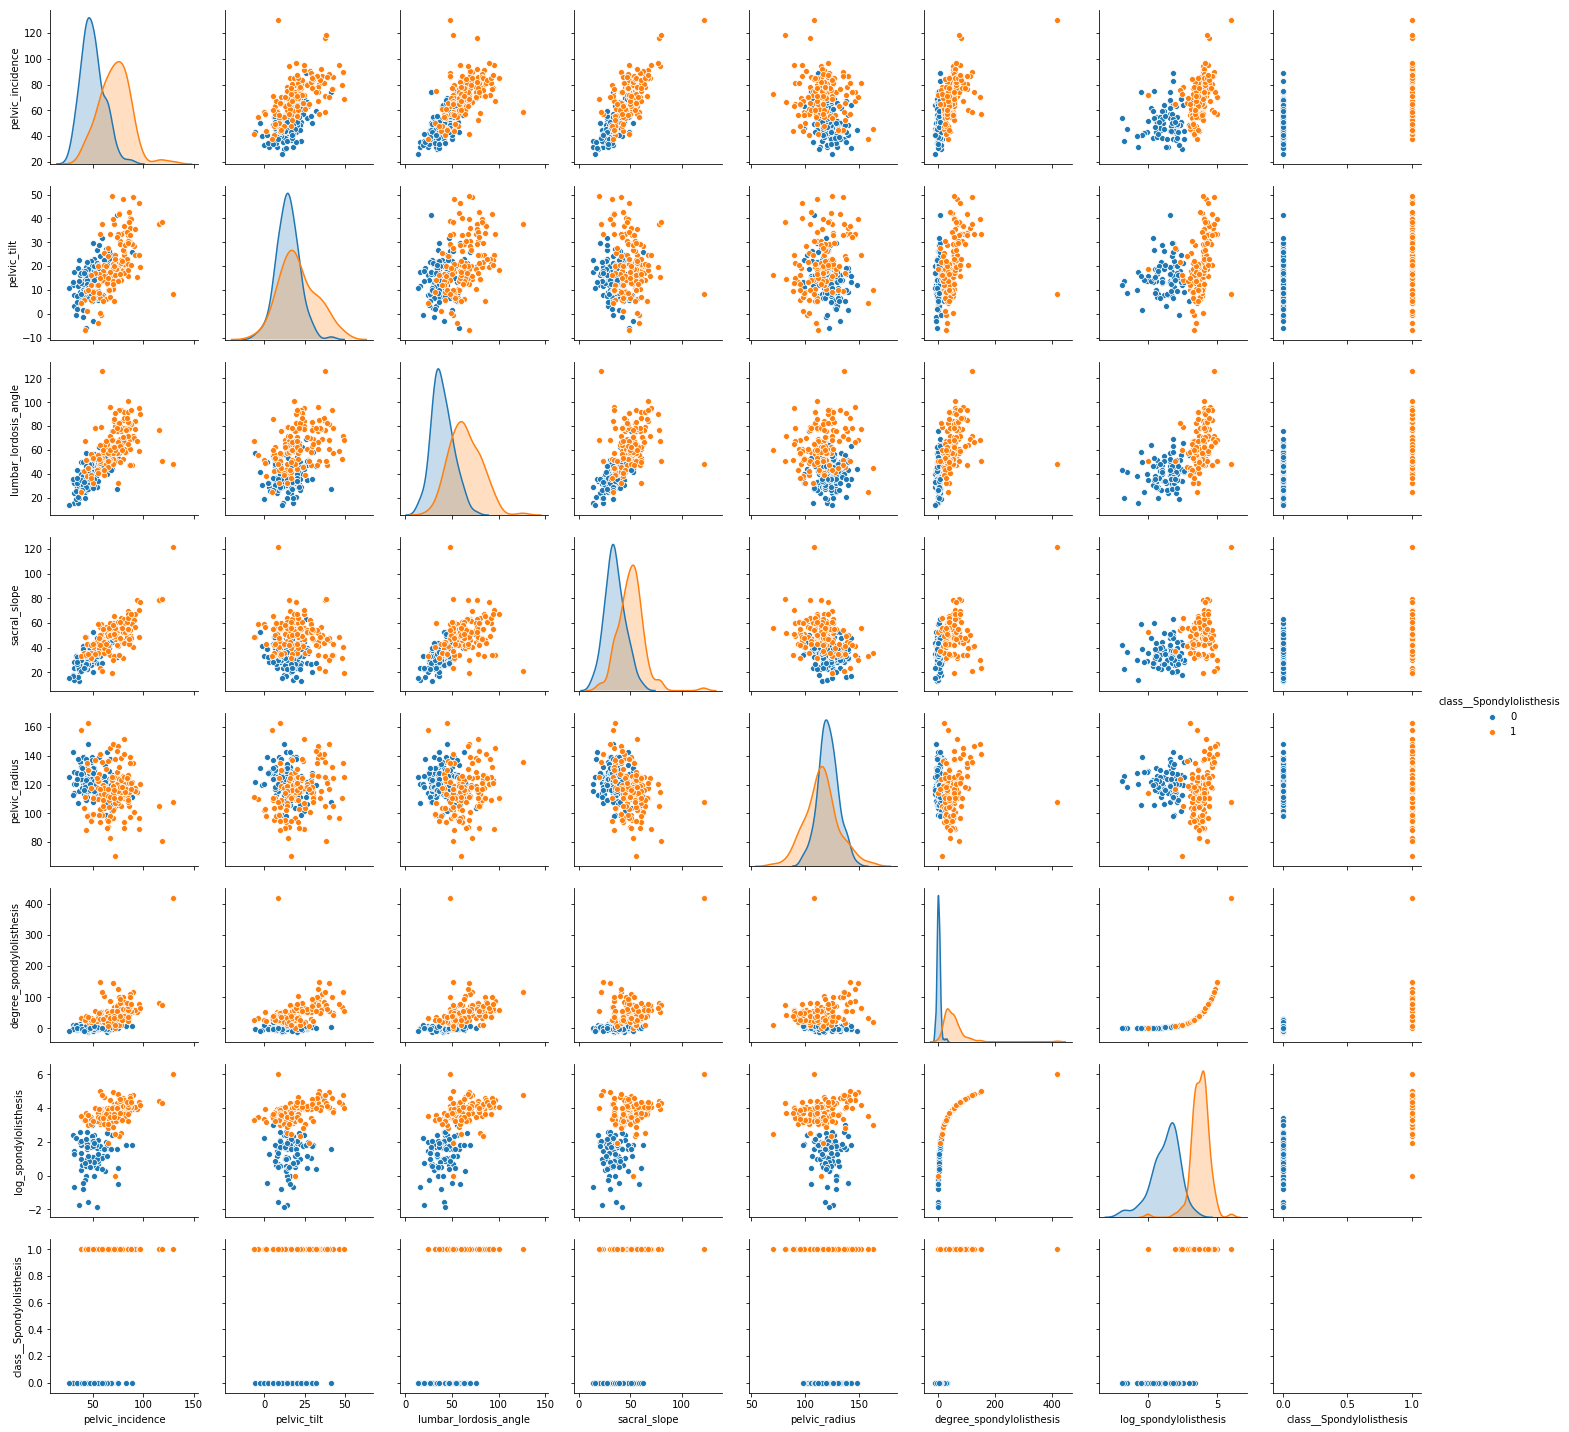

In [41]:
# plot relationships between variables and examine for differences in class
target_cols = []
for col in df.columns:
    if col.startswith("class_"):
        target_cols.append(col)

for target in target_cols:
    print("\n\n", target, "\n\n")
    target_df = pd.concat([df.drop(target_cols, axis=1), df[target]], axis=1)
    plt.figure(figsize=(15, 5))
    sns.pairplot(target_df, hue=target)
    plt.show();

From What I see in this graph, there are no easily found relationships involving 3 variables.